Initial Imports

In [39]:
import torch
import pandas as pd
import numpy as np
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, ToPILImage
from torch import nn

In [3]:
mnist_trainset = MNIST('./data', download=True, train=True, transform=ToTensor())
mnist_testset = MNIST('./data', download=True, train=False, transform=ToTensor())


Initial dataset visualing

In [4]:
import matplotlib.pyplot as plt

def image_grid(image_dataset, rows = 6, columns = 6):
    figure = plt.figure(figsize=(8,8))

    no_of_pictures = rows * columns

    for i in range(1, columns * rows + 1):
        sample_idx = torch.randint(len(image_dataset), size=(1,)).item()
        img, label = image_dataset[sample_idx]
        figure.add_subplot(rows, columns, i)
        plt.title(label)
        plt.axis('off')
        plt.imshow(img, cmap="gray")
    plt.show()

# image_grid(mnist_trainset, 3, 3)

Building the neural network - 1 hidden layers

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)


Model Hyperparameters

In [6]:
from torch.utils.data import DataLoader

learning_rate = 1e-3
batch_size = 64
epochs = 10
loss_fn = nn.CrossEntropyLoss()


train_dataloader = DataLoader(
    dataset=mnist_trainset,
    batch_size=64,
    shuffle=True,
    num_workers=6,
)

test_dataloader = DataLoader(
    dataset=mnist_testset,
    batch_size=64,
    shuffle=True,
    num_workers=6,
)

Optimization set

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):

    for batch, (X, y) in enumerate(dataloader):
        #calculating prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        #backpropagating the calculation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 99 == 0:
            current = batch * len(X)
            size = len(dataloader.dataset)
            print(f'loss: {loss.item():.2f}, [{current:>5d}/{size:>5d}]')

def test_loop(dataloader: DataLoader, model: NeuralNetwork, loss_fn):

    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    correct, test_loss = 0,0

    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float64).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


Training the algorithm

In [8]:
epochs = 10

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print('Done!')


Epoch 1
-------------------------------
loss: 2.31, [    0/60000]
loss: 0.39, [ 6336/60000]
loss: 0.43, [12672/60000]
loss: 0.31, [19008/60000]
loss: 0.23, [25344/60000]
loss: 0.38, [31680/60000]
loss: 0.16, [38016/60000]
loss: 0.24, [44352/60000]
loss: 0.28, [50688/60000]
loss: 0.03, [57024/60000]
Test Error: 
 Accuracy: 96.2%, Avg loss: 0.128330 

Epoch 2
-------------------------------
loss: 0.08, [    0/60000]
loss: 0.06, [ 6336/60000]
loss: 0.11, [12672/60000]
loss: 0.03, [19008/60000]
loss: 0.04, [25344/60000]
loss: 0.06, [31680/60000]
loss: 0.13, [38016/60000]
loss: 0.15, [44352/60000]
loss: 0.02, [50688/60000]
loss: 0.11, [57024/60000]
Test Error: 
 Accuracy: 97.2%, Avg loss: 0.089673 

Epoch 3
-------------------------------
loss: 0.01, [    0/60000]
loss: 0.08, [ 6336/60000]
loss: 0.05, [12672/60000]
loss: 0.04, [19008/60000]
loss: 0.15, [25344/60000]
loss: 0.03, [31680/60000]
loss: 0.17, [38016/60000]
loss: 0.02, [44352/60000]
loss: 0.09, [50688/60000]
loss: 0.02, [57024/600

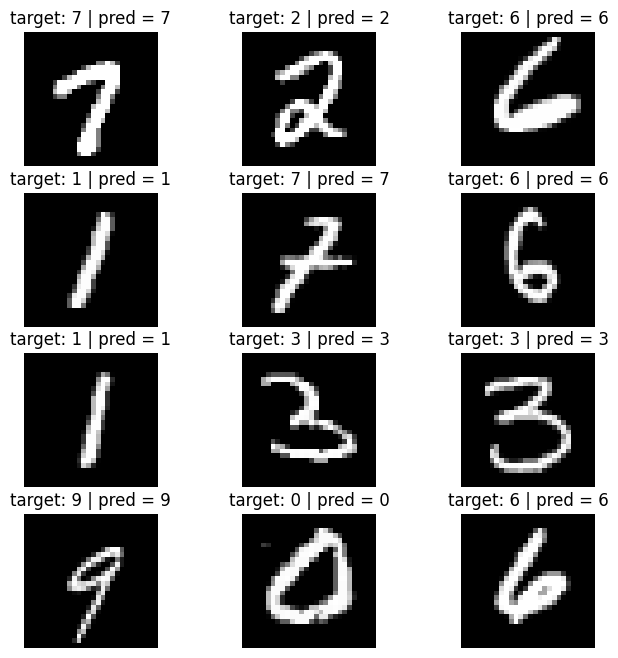

In [55]:
sample_size = 12
samples_idx = np.random.randint(low=1, high=len(test_dataloader.dataset), size=sample_size)

figure = plt.figure(figsize = (8,8))
rows = np.ceil(sample_size/3).astype(int)
columns = 3

i = 0
#Predicting and plotting results for each sample
for sample in range(sample_size):
    i += 1
    test_sample, test_target = test_dataloader.dataset[samples_idx[sample]]
    pred = model(test_sample).argmax(1).type(torch.float64).item()
    figure.add_subplot(rows, columns, i)

    plt.title(label=f'target: {test_target} | pred = {pred:.0f}')
    plt.axis('off')
    plt.imshow(ToPILImage()(test_sample), cmap='gray')
plt.show()



